<a href="https://colab.research.google.com/github/marcelcerri/crescimentomicrobiano/blob/master/Rea%C3%A7%C3%A3o_Enzim%C3%A1tica_Mayra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Importação das Bibliotecas

import os  # divisão de strings
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,  
NavigationToolbar2Tk)
import numpy as np
import pandas as pd
from scipy.integrate import odeint #função de integração numérica
from scipy.optimize import differential_evolution #função de algoritmo genético
import matplotlib.pyplot as plt

In [18]:
#FUNÇÕES

#Função de Modelo Michaelis Menten Sem Inibição                                  
def modelo(s,Vmax,Km):
    return Vmax*s/(Km+s) #Retorna Velocidade (V)

def f_conversao(s0, p):
    return p/s0 * 100

In [19]:
#Equação diferencial -> Balanço de Massa
def eq_dif(C,t, km, Vmax):
    s = C[0]
    p = C[1]

    dSdt = - Cenz*((Vmax * s)/(km+s))
    dPdt = Cenz*((Vmax * s)/(km+s))

    return [dSdt, dPdt]

In [20]:
Vmax = 100
Km = 8000
s0 = 1000
p0 = 0.0
Cenz = 4
conversao = 100
t_input = 120

In [21]:
#Variáveis Estequiometria de Reação
esteq_s = 1
esteq_p = 1

In [22]:
# Criando o conjunto de dados artificiais -> ARRAY
n_ptos = int(1001)               #Número de pontos experimentais
s = np.linspace(0,s0, n_ptos)           #Gera um array com n_ptos de concentração de substrato (s) de 0 a s_max
v = modelo(s,Vmax,Km)           #Calcula a velocidade para cada s (concentração) do array através da função modelo

#Concentração por Tempo
t = np.linspace(0,t_input, int(t_input)+1) #(0 a t_input minutos de reação, minuto a minuto)

C0 = [s0,p0] #Concentração Inicial

C= odeint(eq_dif, C0, t, args = (Km, Vmax)) #Resolução EDO
        
#Conversão
p_max = s0*conversao/100
s_min = s0*(1-(conversao/100))

conv = f_conversao(s0, C[:,1])

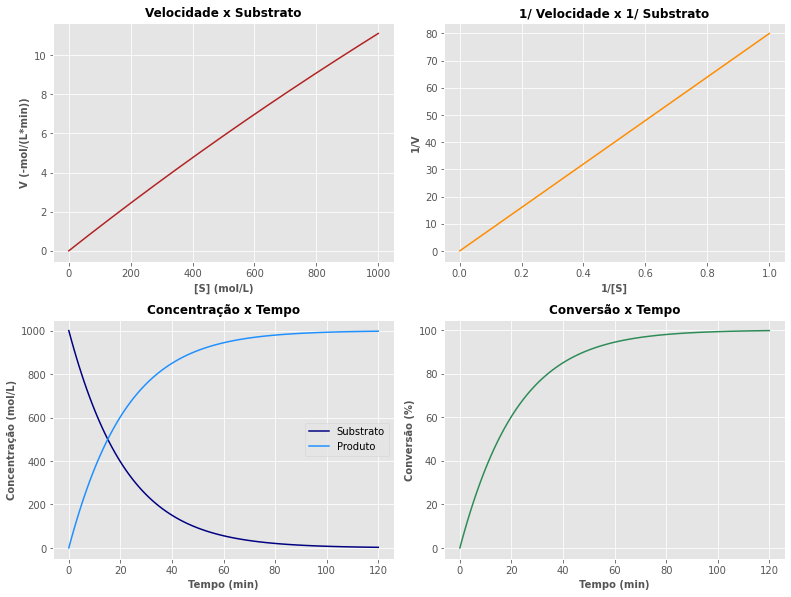

In [23]:
#Quadrante 1 -> Velocidade x Substrato
fig, axs = plt.subplots(2, 2, figsize=(11.1, 8.4))
axs[0,0].plot(s,v, ls='-', color='firebrick', markersize=3)
axs[0,0].set_title('Velocidade x Substrato', fontsize=12, weight='bold')
axs[0,0].set_xlabel('[S] (mol/L)', fontsize=10, weight='bold')
axs[0,0].set_ylabel('V (-mol/(L*min))', fontsize=10, weight='bold')

#Quadrante 2 -> 1/Velocidade x 1/Substrato
np.seterr(divide='ignore', invalid='ignore')
axs[0,1].plot(1/s,1/v, ls='-', color = 'darkorange', markersize=3)
axs[0,1].set_title('1/ Velocidade x 1/ Substrato', fontsize=12, weight='bold')
axs[0,1].set_xlabel('1/[S]', fontsize=10, weight='bold')
axs[0,1].set_ylabel('1/V', fontsize=10, weight='bold')

#Quadrante 3 -> Concentração (Substrato e Produto) x Tempo
axs[1,0].plot(t,C[:,0], ls= '-', color='navy', label='Substrato')
axs[1,0].plot(t,C[:,1], ls='-', color='dodgerblue', label ='Produto')
axs[1,0].set_title('Concentração x Tempo', fontsize=12, weight='bold')
axs[1,0].set_xlabel('Tempo (min)', fontsize=10, weight='bold')
axs[1,0].set_ylabel('Concentração (mol/L)', fontsize=10, weight='bold')
axs[1,0].legend(loc='best')

#Quadrante 4 -> Conversão x Tempo
axs[1,1].plot(t, conv, ls='-', color='seagreen')
axs[1,1].set_title('Conversão x Tempo', fontsize=12, weight='bold')
axs[1,1].set_xlabel('Tempo (min)', fontsize=10, weight='bold')
axs[1,1].set_ylabel('Conversão (%)', fontsize=10, weight='bold')
        
plt.style.use('ggplot')
fig.tight_layout()